In [14]:
import pandas as pd

df = pd.read_csv('Homicides.csv')
df.drop(['Region', 'Subregion', 'Dimension', 'Category', 'Year', 'Unit of measurement', 'Source'], axis=1, inplace=True)
df.head()

country = df.groupby(by='Country')['VALUE'].sum()
country

Country
Afghanistan                           2570.0
Albania                                394.0
Algeria                               5353.0
Andorra                                  4.0
Antigua and Barbuda                     88.0
                                       ...  
Uruguay                               3978.0
Uzbekistan                            1258.0
Vanuatu                                  4.0
Venezuela (Bolivarian Republic of)    8384.0
Zimbabwe                              1560.0
Name: VALUE, Length: 139, dtype: float64

In [15]:
# Religion
import numpy as np

religion = pd.read_csv('religion.csv')
religion.drop(['Region', 'Level', 'Countrycode'], axis=1, inplace=True)
religion.query('Year == 2020', inplace=True)

religion['Population'] = (
    religion['Population']
    .astype(str)
    .str.replace(',', '', regex=False)         
)
religion['Religiously_unaffiliated'] = (
    religion['Religiously_unaffiliated']
    .astype(str)
    .str.replace(',', '', regex=False)
)

religion['Religion Density'] = 1 - (religion['Religiously_unaffiliated'].astype(int) / religion['Population'].astype(int))
religion

,Country,Year,Population,Christians,Muslims,Religiously_unaffiliated,Buddhists,Hindus,Jews,Other_religions,Religion Density
1,All World,2020,7885807101,"2,268,860,679","2,022,590,461",1905359982,"324,185,581","1,177,861,089","14,779,638","172,169,677",0.758381
3,All Asia-Pacific,2020,4544798237,"268,839,155","1,187,663,747",1492753842,"316,111,123","1,166,709,664","185,058","112,535,650",0.671547
5,All Europe,2020,752957406,"505,138,687","45,505,934",190322687,"2,539,594","2,152,636","1,277,202","6,020,665",0.747233
7,All Latin America-Caribbean,2020,646240245,"546,922,208","753,352",77150335,"326,820","695,342","390,861","20,001,329",0.880617
9,All Middle East-North Africa,2020,439686888,"12,918,830","414,112,362",1858569,"88,708","3,223,451","6,788,404","696,565",0.995773
...,...,...,...,...,...,...,...,...,...,...,...
407,Vietnam,2020,98079191,"8,170,016","70,694",66373765,"22,578,634","40,495",125,"845,463",0.323264
409,Western Sahara,2020,549365,847,"546,903",1390,0,0,0,225,0.997470
411,Yemen,2020,36134864,"20,138","36,085,366",22243,197,"2,798",73,"4,047",0.999384
413,Zambia,2020,19059395,"18,731,646","97,449",11389,363,"3,061",191,"215,296",0.999402


In [16]:
# Sex
sex = pd.read_csv('Sex.csv')
sex.drop(['Iso3_code', 'Region', 'Subregion', 'Indicator', 'Dimension', 'Category'], axis=1, inplace=True)
sex = sex.groupby(by='Country')['VALUE'].sum()
sex

Country
Albania                                 1055
Algeria                                11948
Antigua and Barbuda                      183
Argentina                             191104
Armenia                                  412
                                      ...   
United Kingdom (Northern Ireland)      21977
United Kingdom (Scotland)              29045
United States of America             1047935
Uruguay                                 6998
Uzbekistan                              1382
Name: VALUE, Length: 108, dtype: int64

In [17]:
# Corruption 
corruption = pd.read_csv('Corruption.csv')
corruption.query('`Unit of measurement` == "Counts"', inplace=True)
corruption = corruption.groupby(by='Country')['VALUE'].sum()
corruption

Country
Albania                                7276.0
Algeria                                4208.0
Antigua and Barbuda                     919.0
Argentina                            229808.0
Armenia                                2279.0
                                       ...   
United Kingdom (Northern Ireland)     25063.0
United Kingdom (Scotland)            108546.0
United States of America               9393.0
Uruguay                              146276.0
Uzbekistan                              158.0
Name: VALUE, Length: 107, dtype: float64

In [18]:
# Merging
merged_df = pd.merge(religion, country, how='inner', on=['Country'])
merged_df = pd.merge(merged_df, sex, how='inner', on=['Country'], suffixes=('_hom', '_sex'))
merged_df = pd.merge(merged_df, corruption, how='inner', on=['Country'])
merged_df['Homicide Density'] = merged_df['VALUE_hom'].astype(int) / merged_df['Population'].astype(int) * 100
merged_df['Sex Assault Density'] = merged_df['VALUE_sex'].astype(int) / merged_df['Population'].astype(int) * 100
merged_df = merged_df.rename(columns={'VALUE': 'VALUES_corr'})
merged_df['Corruption Density'] = merged_df['VALUES_corr'].astype(int) / merged_df['Population'].astype(int) * 100
# merged_df.sort_values(by='Homicide Density', ascending=False)
merged_df.head()


,Country,Year,Population,Christians,Muslims,Religiously_unaffiliated,Buddhists,Hindus,Jews,Other_religions,Religion Density,VALUE_hom,VALUE_sex,VALUES_corr,Homicide Density,Sex Assault Density,Corruption Density
0,Albania,2020,2871954,"511,657","2,139,813",219787,5,20,289,382,0.923471,394.0,1055,7276.0,0.013719,0.036735,0.253347
1,Algeria,2020,44042091,"129,920","43,329,641",557664,"6,607",0,57,"18,202",0.987338,5353.0,11948,4208.0,0.012154,0.027129,0.009554
2,Argentina,2020,45191965,"39,974,074","419,922",4172533,"14,038","1,163","173,979","436,255",0.907671,24582.0,191104,229808.0,0.054395,0.422872,0.508515
3,Armenia,2020,2890893,"2,813,205","7,712",34051,309,216,103,"35,296",0.988221,248.0,412,2279.0,0.008579,0.014252,0.078834
4,Australia,2020,25743791,"12,035,331","901,843",10900956,"672,312","762,897","108,230","362,221",0.576560,1506.0,111312,678150.0,0.005850,0.432384,2.634227


In [19]:
import pandas as pd

relig = pd.read_csv("religion.csv")
corr = pd.read_csv("Corruption.csv")

print("Religion columns:", relig.columns.tolist())
print("Corruption columns:", corr.columns.tolist())

Religion columns: ['Region', 'Country', 'Year', 'Population', 'Christians', 'Muslims', 'Religiously_unaffiliated', 'Buddhists', 'Hindus', 'Jews', 'Other_religions', 'Level', 'Countrycode']
Corruption columns: ['Iso3_code', 'Country', 'Region', 'Subregion', 'Indicator', 'Dimension', 'Category', 'Sex', 'Age', 'Year', 'Unit of measurement', 'VALUE', 'Source']


In [20]:
print(df.columns)

Index(['Iso3_code', 'Country', 'Indicator', 'Sex', 'Age', 'VALUE'], dtype='object')


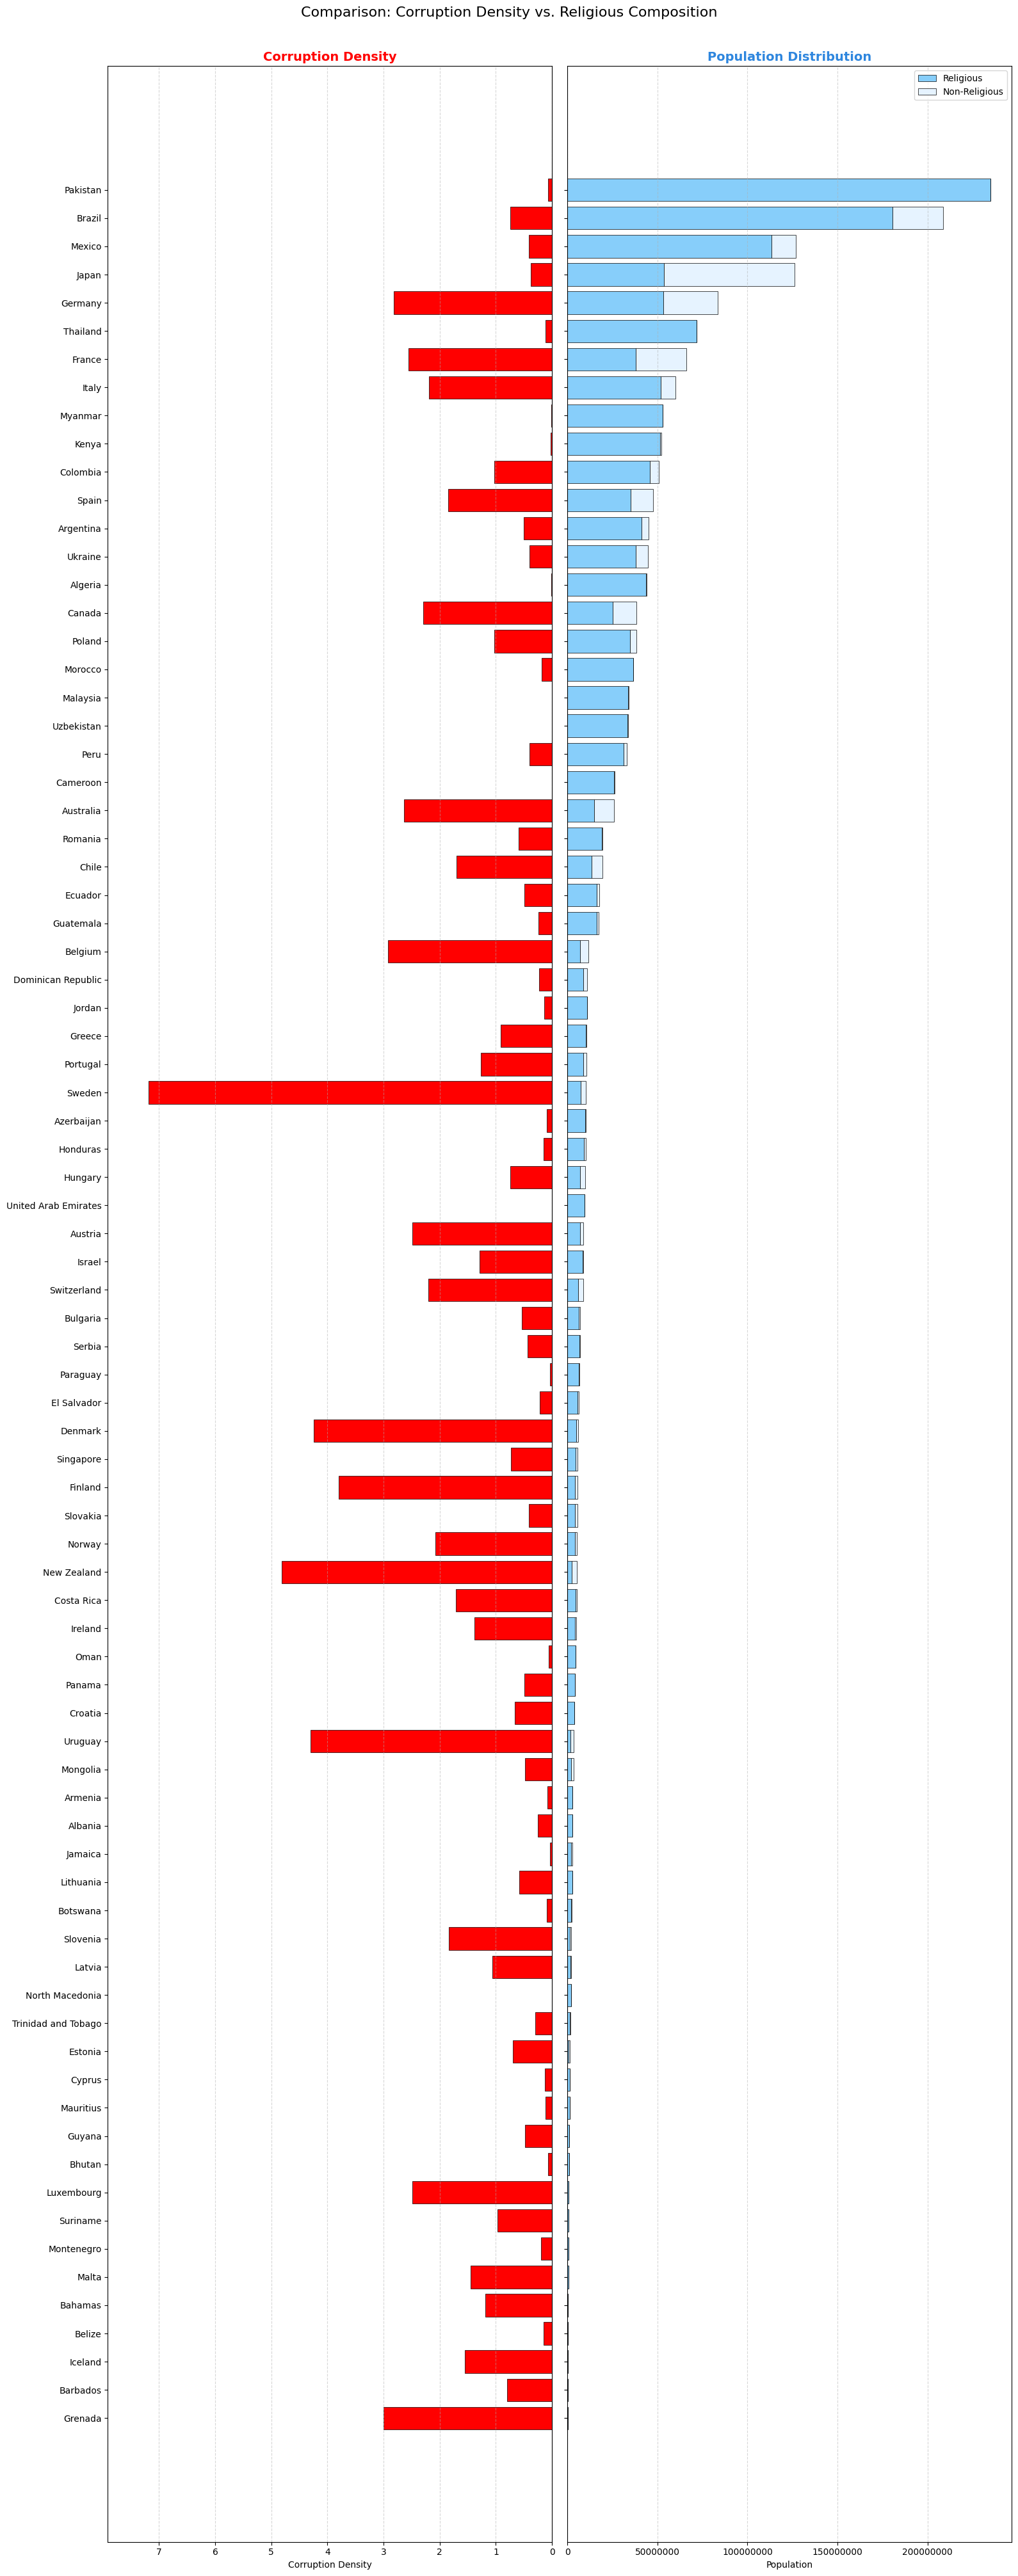

In [23]:
#Corruption vs religion plot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =======================
# Load data
# =======================
df = pd.read_csv("final_1.csv")


# =======================
# Clean numeric columns
# =======================
cols_to_clean = [
    'Christians', 'Muslims', 'Buddhists', 'Hindus', 'Jews',
    'Other_religions', 'Religiously_unaffiliated',
    'Population', 'corruption_density'   # <-- Replace VALUE_hom
]

for col in cols_to_clean:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')

# =======================
# Filter & compute new columns
# =======================
#df_filtered = df[df['Population'] > 2000000].copy()
df_filtered = df.copy()
df_filtered['Non_Religious_Count'] = df_filtered['Religiously_unaffiliated']
df_filtered['Religious_Count'] = df_filtered['Population'] - df_filtered['Non_Religious_Count']

# =======================
# Sort countries by population
# =======================
df_sorted = df_filtered.sort_values(by='Population', ascending=True)

# =======================
# Create figure
# =======================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, len(df_sorted) * 0.5), sharey=True)

# =======================
# LEFT SIDE: Corruption Density
# =======================
ax1.barh(
    df_sorted['Country'],
    df_sorted['Corruption Density'],
    color='#FF0000',
    edgecolor='black',
    linewidth=0.5
)

ax1.set_xlim(max(df_sorted['Corruption Density']) * 1.1, 0)
ax1.set_xlabel('Corruption Density')
ax1.set_title('Corruption Density', fontsize=14, fontweight='bold', color='#FF0000')
ax1.grid(axis='x', linestyle='--', alpha=0.5)

# =======================
# RIGHT SIDE: Religious vs Non-Religious (Stacked)
# =======================

p1 = ax2.barh(
    df_sorted['Country'],
    df_sorted['Religious_Count'],
    color='#87CEFA',
    label='Religious',
    edgecolor='black',
    linewidth=0.5
)

p2 = ax2.barh(
    df_sorted['Country'],
    df_sorted['Non_Religious_Count'],
    left=df_sorted['Religious_Count'],
    color='#E6F3FF',
    label='Non-Religious',
    edgecolor='black',
    linewidth=0.5
)

ax2.set_xlabel('Population')
ax2.set_title('Population Distribution', fontsize=14, fontweight='bold', color='#2e86de')
ax2.legend()
ax2.grid(axis='x', linestyle='--', alpha=0.5)
ax2.ticklabel_format(style='plain', axis='x')

plt.subplots_adjust(wspace=0.0)

plt.suptitle(
    'Comparison: Corruption Density vs. Religious Composition',
    fontsize=16,
    y=1.005
)

plt.tight_layout()
plt.show()


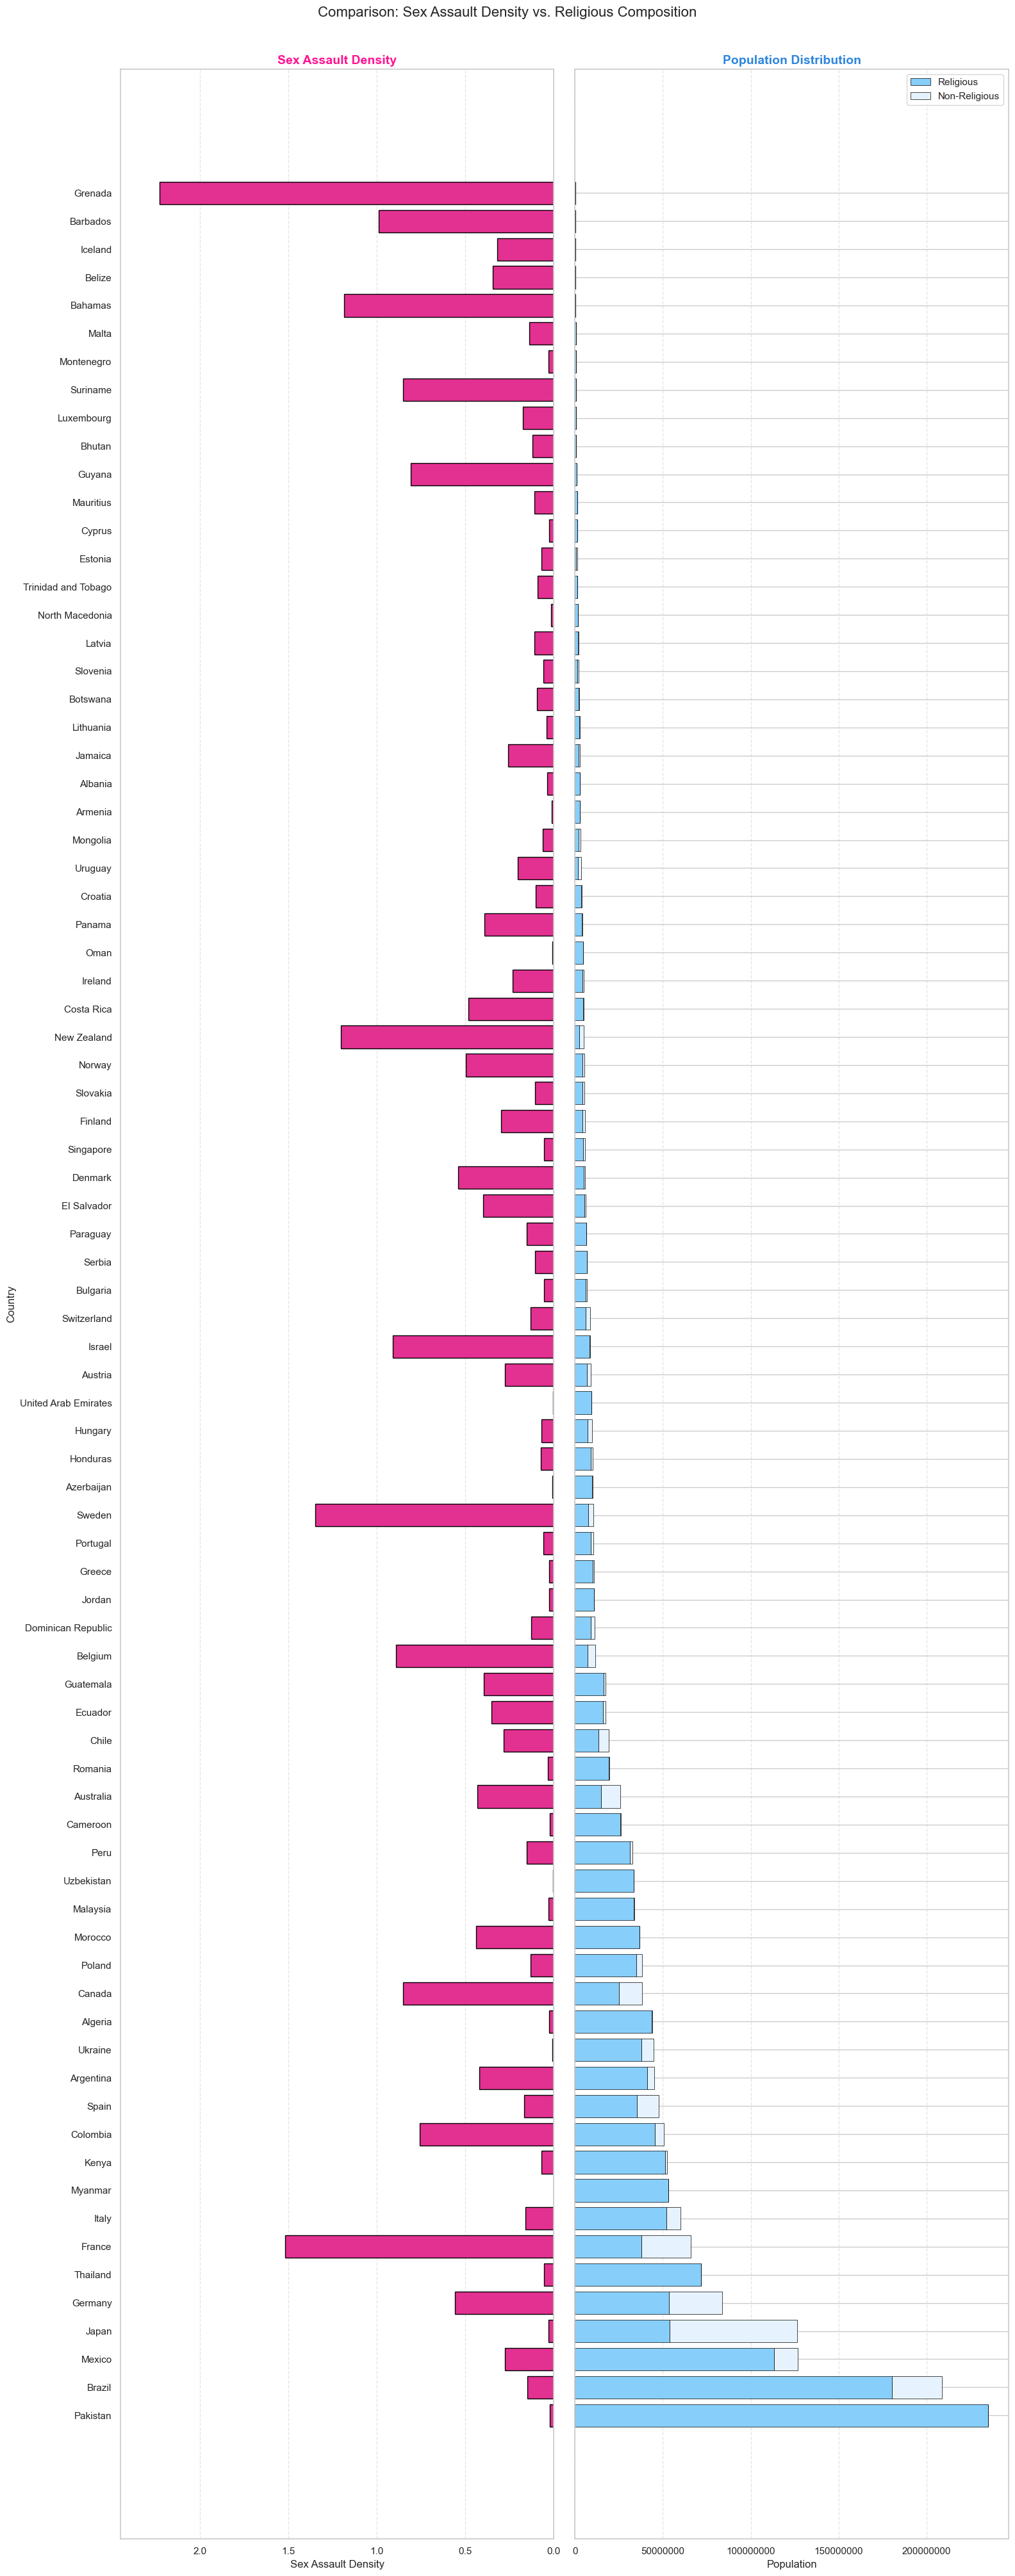

In [24]:
#Sex Assault vs religion plot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# ==========================================
# Load data
# ==========================================
df = pd.read_csv("final_1.csv")

# ==========================================
# Clean numeric columns
# ==========================================
cols_to_clean = [
    'Christians', 'Muslims', 'Buddhists', 'Hindus', 'Jews',
    'Other_religions', 'Religiously_unaffiliated',
    'Population', 'VALUE_sex_assault'  # <-- NEW VARIABLE HERE
]

for col in cols_to_clean:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')

# ==========================================
# Filter large countries
# ==========================================
#df_filtered = df[df['Population'] > 2000000].copy()
df_filtered = df.copy()
# ==========================================
# Religious composition
# ==========================================
df_filtered['Non_Religious_Count'] = df_filtered['Religiously_unaffiliated']
df_filtered['Religious_Count'] = df_filtered['Population'] - df_filtered['Non_Religious_Count']

# ==========================================
# Sort
# ==========================================
df_sorted = df_filtered.sort_values(by='Population', ascending=True)

# ==========================================
# Create figure layout
# ==========================================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, len(df_sorted) * 0.5), sharey=True)

# ==========================================
# LEFT PANEL — Sex Assault Density
# ==========================================
sns.barplot(
    y=df_sorted['Country'],
    x=df_sorted['Sex Assault Density'],    # <-- NEW VARIABLE
    ax=ax1,
    color='#FF1493',  # Pink-ish to signal assault-related variable
    edgecolor='black'
)

ax1.set_xlim(max(df_sorted['Sex Assault Density']) * 1.1, 0)
ax1.set_xlabel('Sex Assault Density')
ax1.set_title('Sex Assault Density', fontsize=14, fontweight='bold', color='#FF1493')
ax1.grid(axis='x', linestyle='--', alpha=0.5)

# ==========================================
# RIGHT PANEL — Religious vs Non-religious
# ==========================================
ax2.barh(
    df_sorted['Country'],
    df_sorted['Religious_Count'],
    color='#87CEFA',
    label='Religious',
    edgecolor='black',
    linewidth=0.5
)

ax2.barh(
    df_sorted['Country'],
    df_sorted['Non_Religious_Count'],
    left=df_sorted['Religious_Count'],
    color='#E6F3FF',
    label='Non-Religious',
    edgecolor='black',
    linewidth=0.5
)

ax2.set_xlabel('Population')
ax2.set_title('Population Distribution', fontsize=14, fontweight='bold', color='#2e86de')
ax2.legend()
ax2.grid(axis='x', linestyle='--', alpha=0.5)
ax2.ticklabel_format(style='plain', axis='x')

# ==========================================
# Final layout
# ==========================================
plt.subplots_adjust(wspace=0.0)

plt.suptitle(
    'Comparison: Sex Assault Density vs. Religious Composition',
    fontsize=16,
    y=1.005
)

plt.tight_layout()
plt.show()


Columns found: ['Country', 'Year', 'Population', 'Christians', 'Muslims', 'Religiously_unaffiliated', 'Buddhists', 'Hindus', 'Jews', 'Other_religions', 'Religion Density', 'VALUE_hom', 'VALUE_sex', 'VALUES_corr', 'Homicide Density', 'Sex Assault Density', 'Corruption Density']


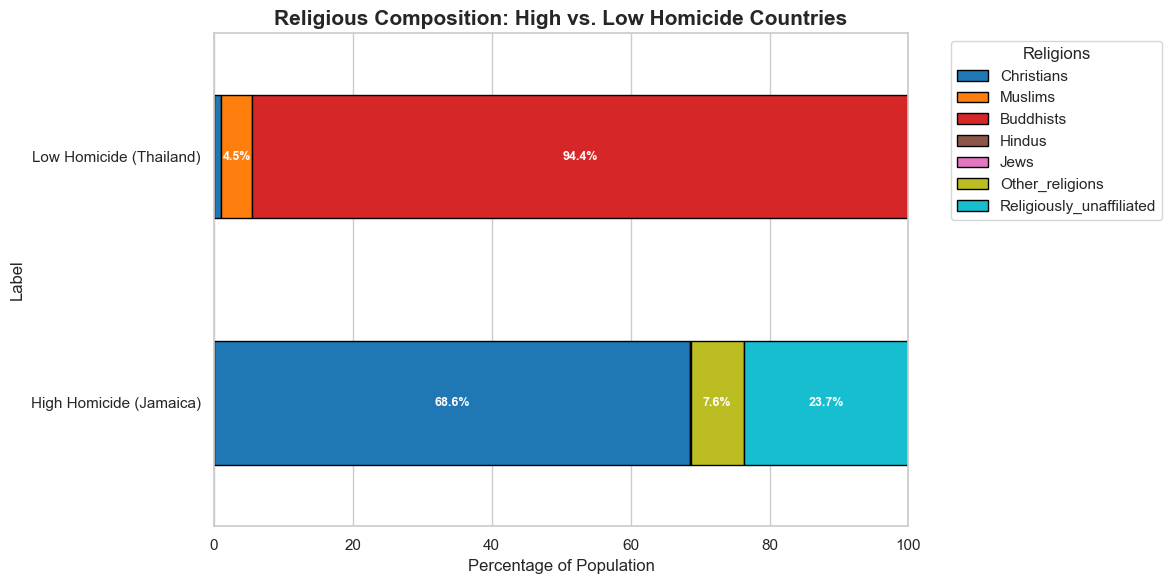

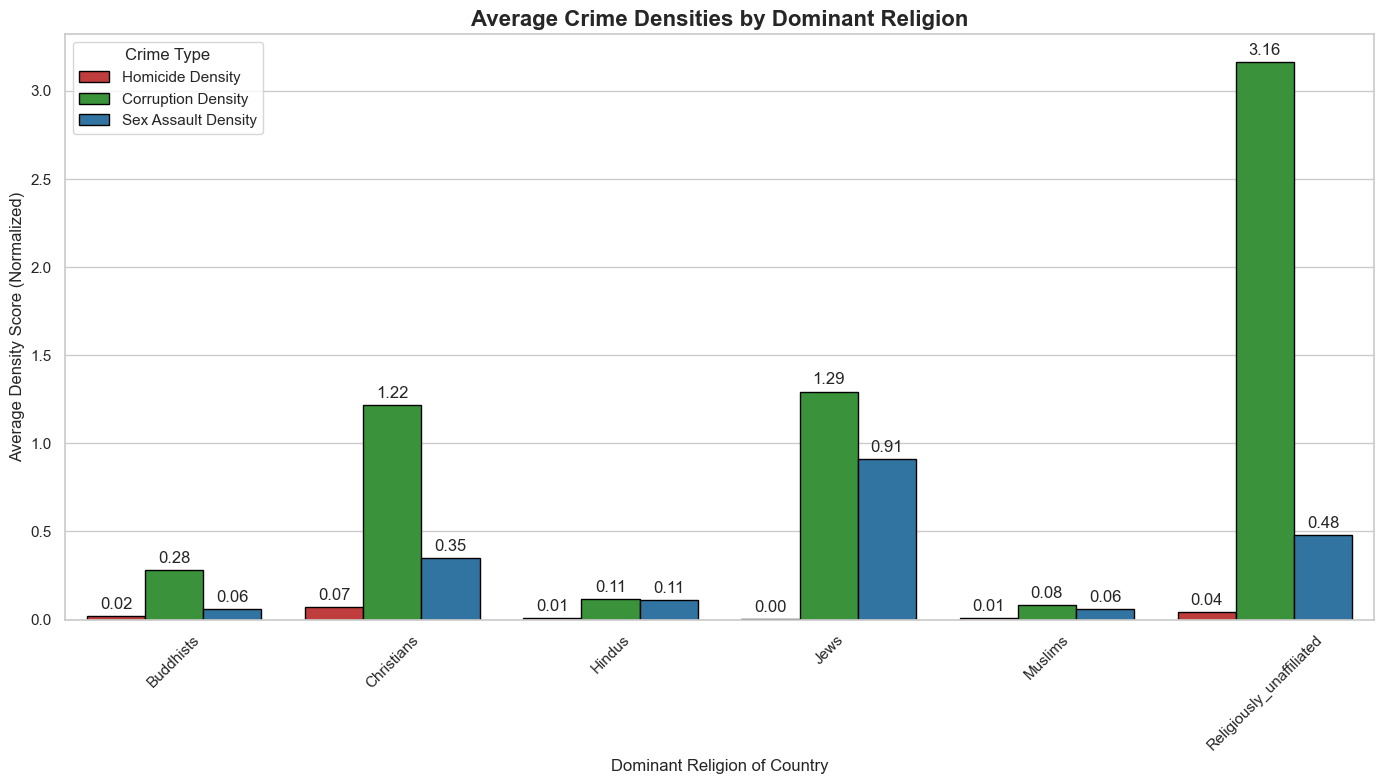

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ==========================================
# 1. Load and Clean Data
# ==========================================
try:
    # Load the dataset
    df = pd.read_csv('final_1.csv')
    
    # FIX: Remove any leading/trailing spaces from column names
    df.columns = df.columns.str.strip()
    
    print("Columns found:", df.columns.tolist()) # Debugging print

except FileNotFoundError:
    print("Error: 'final_1.csv' not found. Trying to use an existing DataFrame from the notebook (fallback).")
    # Try common fallback variables defined elsewhere in the notebook
    fallback = None
    for varname in ['df_filtered', 'df_sorted', 'merged_df', 'df_clean', 'merged_df', 'df']:
        if varname in globals() and isinstance(globals()[varname], pd.DataFrame) and not globals()[varname].empty:
            fallback = globals()[varname].copy()
            print(f"Using fallback dataframe from variable '{varname}'.")
            break
    if fallback is not None:
        df = fallback
    else:
        print("No suitable fallback dataframe found. Creating empty df.")
        df = pd.DataFrame()

# List of columns to clean (remove commas and convert to numeric)
# We include all potential column names
numeric_cols = [
    'Christians', 'Muslims', 'Buddhists', 'Hindus', 'Jews', 
    'Other_religions', 'Religiously_unaffiliated', 'Population',
    'VALUE_hom', 'VALUE_sex', 'VALUES_corr', 
    'Homicide Density', 'Sex Assault Density', 'Corruption Density'
]

for col in numeric_cols:
    if col in df.columns:
        # Remove commas if they exist and convert to numeric
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')

# ==========================================
# 2. Ensure Densities Exist (Safe Calculation)
# ==========================================

# HOMICIDE
if 'Homicide Density' not in df.columns or df['Homicide Density'].isnull().all():
    if 'VALUE_hom' in df.columns and 'Population' in df.columns:
        df['Homicide Density'] = (df['VALUE_hom'] / df['Population']) * 100
    else:
        print("⚠️ Warning: Could not calculate Homicide Density (Missing 'VALUE_hom'). Using available data.")

# SEX ASSAULT
if 'Sex Assault Density' not in df.columns or df['Sex Assault Density'].isnull().all():
    # Check for likely column names for Sex Assault values
    possible_cols = ['VALUE_sex', 'VALUE_sex_assault']
    found_col = next((c for c in possible_cols if c in df.columns), None)
    if found_col is not None and 'Population' in df.columns:
        # Safe calculation (per-100 basis)
        df['Sex Assault Density'] = (df[found_col] / df['Population']) * 100
    else:
        print("⚠️ Warning: Could not calculate Sex Assault Density. Using available data.")

# CORRUPTION
if 'Corruption Density' not in df.columns or df['Corruption Density'].isnull().all():
    if 'VALUES_corr' in df.columns and 'Population' in df.columns:
        df['Corruption Density'] = (df['VALUES_corr'] / df['Population']) * 100

# Drop rows where critical data is still missing for the plots
df_clean = df.dropna(subset=['Homicide Density', 'Population']).copy()

# ==========================================
# 3. Graphs 1 & 2: High vs Low Homicide Country Composition
# ==========================================

if not df_clean.empty:
    # Identify High and Low Homicide Countries
    high_hom_country = df_clean.loc[df_clean['Homicide Density'].idxmax()]
    low_hom_country = df_clean.loc[df_clean['Homicide Density'].idxmin()]

    # Prepare data for plotting
    comparison_countries = pd.concat([high_hom_country.to_frame().T, low_hom_country.to_frame().T])
    # Build labels safely from the two Series (avoid creating list-of-Series)
    labels = [
        f"High Homicide ({high_hom_country['Country']})",
        f"Low Homicide ({low_hom_country['Country']})"
    ]
    # ensure simple 0..n index so labels align with rows
    comparison_countries = comparison_countries.reset_index(drop=True)
    comparison_countries['Label'] = labels

    # Religion Columns
    religion_cols = ['Christians', 'Muslims', 'Buddhists', 'Hindus', 'Jews', 'Other_religions', 'Religiously_unaffiliated']
    
    # Calculate percentages for the stacked bar
    comp_data = comparison_countries.set_index('Label')[religion_cols]
    comp_data_pct = comp_data.div(comp_data.sum(axis=1), axis=0) * 100

    # Plotting Side-by-Side 100% Stacked Bar
    fig, ax = plt.subplots(figsize=(12, 6))
    comp_data_pct.plot(kind='barh', stacked=True, ax=ax, colormap='tab10', edgecolor='black')

    ax.set_xlabel('Percentage of Population')
    ax.set_title('Religious Composition: High vs. Low Homicide Countries', fontsize=15, fontweight='bold')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Religions')
    ax.set_xlim(0, 100)

    # Add text labels
    for n, x in enumerate([*comp_data_pct.index.values]):
        for (cs, ab, pc) in zip(comp_data_pct.iloc[n].cumsum(), 
                                comp_data_pct.iloc[n].cumsum() - comp_data_pct.iloc[n]/2, 
                                comp_data_pct.iloc[n]):
            if pc > 3: 
                plt.text(ab, n, str(round(pc, 1)) + '%', va='center', ha='center', color='white', fontsize=9, fontweight='bold')

    plt.tight_layout()
    plt.show()
else:
    print("Not enough data to generate Homicide comparison graphs.")

# ==========================================
# 4. Graph 3: Crime Densities by Dominant Religion
# ==========================================

if not df_clean.empty:
    # Determine "Dominant Religion"
    df_clean['Dominant_Religion'] = df_clean[religion_cols].idxmax(axis=1)

    # Group by Dominant Religion and calculate mean densities
    crime_means = df_clean.groupby('Dominant_Religion')[['Homicide Density', 'Corruption Density', 'Sex Assault Density']].mean()
    crime_means = crime_means.reset_index()

    # Melt for Grouped Bar Chart
    crime_melted = crime_means.melt(id_vars='Dominant_Religion', 
                                    var_name='Crime Type', 
                                    value_name='Average Density (%)')

    # Plotting
    plt.figure(figsize=(14, 8))
    sns.set_style("whitegrid")

    chart = sns.barplot(
        data=crime_melted,
        x='Dominant_Religion',
        y='Average Density (%)',
        hue='Crime Type',
        palette=['#d62728', '#2ca02c', '#1f77b4'],
        edgecolor='black'
    )

    plt.title('Average Crime Densities by Dominant Religion', fontsize=16, fontweight='bold')
    plt.xlabel('Dominant Religion of Country', fontsize=12)
    plt.ylabel('Average Density Score (Normalized)', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Crime Type')

    for container in chart.containers:
        chart.bar_label(container, fmt='%.2f', padding=3)

    plt.tight_layout()
    plt.show()